In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.ndimage

## Laplacian Masks
• Η Λαπλασιανή μάσκα ως τελεστής παραγώγου ενισχύει ασυνέχειες έντασης στην
εικόνα (π.χ. ακμές) ενώ παράλληλα αποδυναμώνει περιοχές όπου οι εντάσεις
μεταβάλλονται αργά.

• Το αποτέλεσμα είναι να έχουμε εικόνα με γκρίζες αποχρώσεις-γραμμές στις ακμές
και ασυνέχειες της εικόνας στο προσκήνιο, ενώ το υπόλοιπο εμφανίζεται ως
σκοτεινό υπόβαθρο χωρίς ιδιαίτερα χαρακτηριστικά.

• Τα χαρακτηριστικά του υποβάθρου μπορούν να «ανακτηθούν», μαζί με την
επίδραση-όξυνση της Λαμπλασιανής απλά προσθέτοντας (ή αφαιρώντας) την
Λαπλασσιανή εικόνα στην (από την) αρχική

In [3]:
Grayscale_Image = mpimg.imread('moon.png')
Grayscale_Image= np.asarray(Grayscale_Image, dtype = np.float64 )

### Αυτόματος Τρόπος

In [4]:
Image_Lapplaced=scipy.ndimage.filters.laplace(Grayscale_Image) #εφαρμογή λαπλασιανιού φίλτρου στην εικόνα

#αφαιρούμε την Image_Lapplaced από την αρχική εικόνα ώστε να πάρουμε ως αποτέλεσμα μια οξυμένη εικόνα
Image_Sharpenned=Grayscale_Image-Image_Lapplaced                   
                             
#κανονικοποίηση τιμ΄ών εικόνας   
Image_Sharpenned=(Image_Sharpenned-np.min(Image_Sharpenned))*255/(np.max(Image_Sharpenned)-np.min(Image_Sharpenned))
Image_Sharpenned=np.around(Image_Sharpenned)
Image_Sharpenned=np.asarray(Image_Sharpenned, dtype=np.uint8)

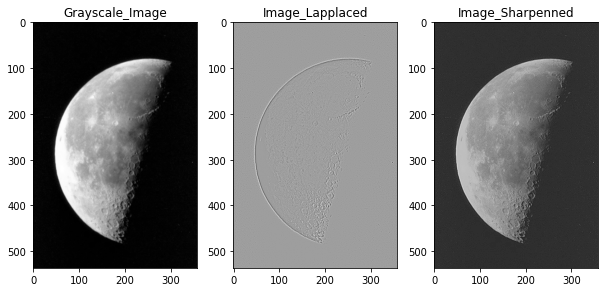

In [5]:
figure1=plt.figure(1, figsize=(8.5, 8.5))

subplot1=figure1.add_subplot(1,3,1)
plt.imshow(Grayscale_Image,cmap="gray")
subplot1.set_title('Grayscale_Image')

subplot1=figure1.add_subplot(1,3,2)
plt.imshow(Image_Lapplaced,cmap="gray")
subplot1.set_title('Image_Lapplaced')

subplot1=figure1.add_subplot(1,3,3)
plt.imshow(Image_Sharpenned,cmap="gray")
subplot1.set_title('Image_Sharpenned')

figure1.tight_layout()

### Manual Τρόπος με κατασκευή μάσκας
**TIP** το πρόσημο του κεντρικού σημείου της μάσκας μας υποδηλώνει αν θα κάνουμε πρόσθεση ή αφαίρεση της Lapplaced Image από την αρχική

In [6]:
mask_manual=np.ones((3,3))

mask_manual[1,1]=-8 #αρνητικό πρόσημο του κεντρικού σημείου υποδηλώνει ότι θα πρέπει να κάνω αφαίρεση
mask_manual

array([[ 1.,  1.,  1.],
       [ 1., -8.,  1.],
       [ 1.,  1.,  1.]])

In [7]:
rows, columns = Grayscale_Image.shape

Image_Lapplaced_manual=np.zeros((rows,columns))

#περνάμε τη μάσκα που φτιάξαμε από κάθε σημείο (i,k) της εικόνας
for i in range(1,(rows-1)):
    for k in range(1,(columns-1)):
        Image_Lapplaced_manual[i,k]= mask_manual[0,0]*Grayscale_Image[i-1,k-1]+\
                                     mask_manual[0,1]*Grayscale_Image[i-1,k]+\
                                     mask_manual[0,2]*Grayscale_Image[i-1,k+1]+\
                                     mask_manual[1,0]*Grayscale_Image[i,k-1]+\
                                     mask_manual[1,1]*Grayscale_Image[i,k]+\
                                     mask_manual[1,2]*Grayscale_Image[i,k+1]+\
                                     mask_manual[2,0]*Grayscale_Image[i+1,k-1]+\
                                     mask_manual[2,1]*Grayscale_Image[i+1,k]+\
                                     mask_manual[2,2]*Grayscale_Image[i+1,k+1]

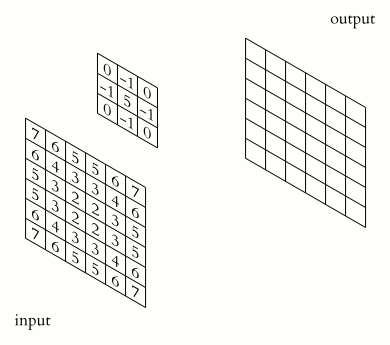

In [12]:
# αφαίρεση της Lapplaced εικόνας από την αρχική
Image_Sharpenned_manual = Grayscale_Image - Image_Lapplaced_manual

#κανονικοποίηση τιμ΄ών εικόνας   
Image_Sharpenned_manual = (Image_Sharpenned_manual-np.min(Image_Sharpenned_manual))*255/(np.max(Image_Sharpenned_manual)-\
                                                                                       np.min(Image_Sharpenned_manual))
Image_Sharpenned_manual = np.around(Image_Sharpenned_manual)
Image_Sharpenned_manual = np.asarray(Image_Sharpenned_manual, dtype=np.uint8)

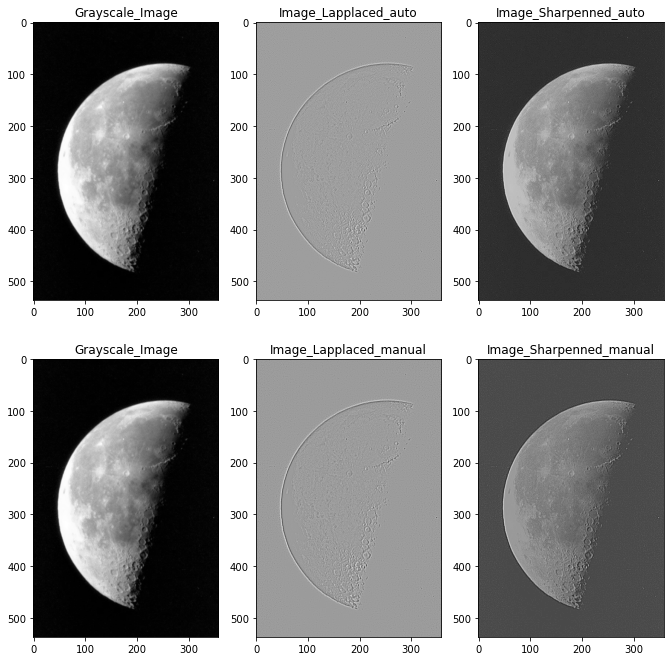

In [53]:
figure2=plt.figure(2, figsize=(9.5, 9.5))

subplot2=figure2.add_subplot(2,3,1)
plt.imshow(Grayscale_Image,cmap="gray")
subplot2.set_title('Grayscale_Image')

subplot2=figure2.add_subplot(2,3,2)
plt.imshow(Image_Lapplaced,cmap="gray")
subplot2.set_title('Image_Lapplaced_auto')

subplot2=figure2.add_subplot(2,3,3)
plt.imshow(Image_Sharpenned,cmap="gray")
subplot2.set_title('Image_Sharpenned_auto')

subplot2=figure2.add_subplot(2,3,4)
plt.imshow(Grayscale_Image,cmap="gray")
subplot2.set_title('Grayscale_Image')

subplot2=figure2.add_subplot(2,3,5)
plt.imshow(Image_Lapplaced_manual,cmap="gray")
subplot2.set_title('Image_Lapplaced_manual')

subplot2=figure2.add_subplot(2,3,6)
plt.imshow(Image_Sharpenned_manual,cmap="gray")
subplot2.set_title('Image_Sharpenned_manual')

figure2.tight_layout()

### Ημι-αυτόματος Τρόπος

In [54]:
mask_manual_2=np.ones((3,3))
mask_manual_2[1,1]=-8

rows=len(Grayscale_Image)
columns=len(Grayscale_Image[0])

#έυρεση της λαπλασιανής εικόναςμε χρήση της convolve
Image_Lapplaced_manual_2=np.zeros((rows,columns))
Image_Lapplaced_manual_2=scipy.ndimage.convolve(Grayscale_Image,mask_manual_2)

#βρίσκουμε την οξυμένη εικόνα
Image_Sharpenned_manual_2=Grayscale_Image-Image_Lapplaced_manual_2

#κανονικοποίηση τιμ΄ών εικόνας   
Image_Sharpenned_manual_2=(Image_Sharpenned_manual_2-np.min(Image_Sharpenned_manual_2))*255/(np.max(Image_Sharpenned_manual_2)-\
                                                                                       np.min(Image_Sharpenned_manual_2))
Image_Sharpenned_manual_2=np.around(Image_Sharpenned_manual_2)
Image_Sharpenned_manual_2=np.asarray(Image_Sharpenned_manual_2, dtype=np.uint8)

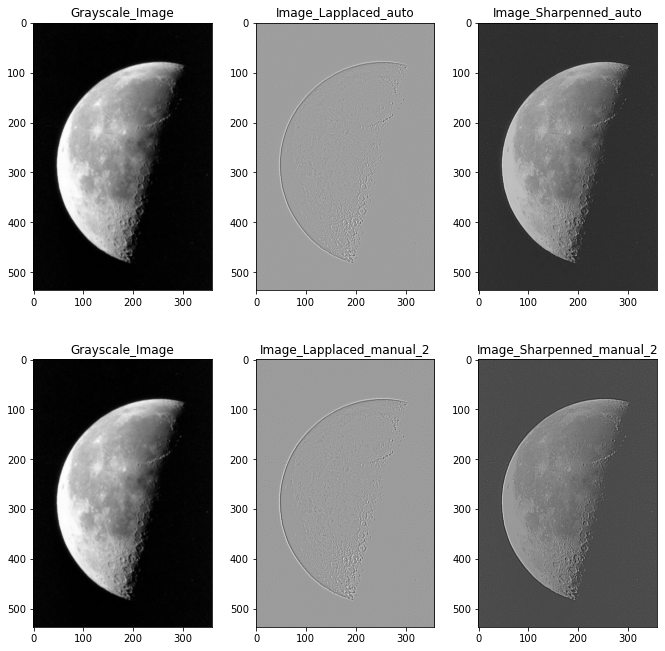

In [55]:
figure3=plt.figure(3, figsize=(9.5, 9.5))

subplot3=figure3.add_subplot(2,3,1)
plt.imshow(Grayscale_Image,cmap="gray")
subplot3.set_title('Grayscale_Image')

subplot3=figure3.add_subplot(2,3,2)
plt.imshow(Image_Lapplaced,cmap="gray")
subplot3.set_title('Image_Lapplaced_auto')

subplot3=figure3.add_subplot(2,3,3)
plt.imshow(Image_Sharpenned,cmap="gray")
subplot3.set_title('Image_Sharpenned_auto')

subplot3=figure3.add_subplot(2,3,4)
plt.imshow(Grayscale_Image,cmap="gray")
subplot3.set_title('Grayscale_Image')

subplot3=figure3.add_subplot(2,3,5)
plt.imshow(Image_Lapplaced_manual_2,cmap="gray")
subplot3.set_title('Image_Lapplaced_manual_2')

subplot3=figure3.add_subplot(2,3,6)
plt.imshow(Image_Sharpenned_manual_2,cmap="gray")
subplot3.set_title('Image_Sharpenned_manual_2')

figure3.tight_layout()

## Sharpening with Unsharp Method

Είναι μια διαδικασία που έχει χρησιμοποιηθεί για πολλά χρόνια από τη βιομηχανία
εκτύπωσης και εκδόσεων για να οξύνει εικόνες. Αποτελείται από την αφαίρεση
μιας εξομαλυμένης έκδοσης μιας εικόνας από την αρχική.

Η διαδικασία ονομάζεται unsharpmasking,και αποτελείται από τα παρακάτω βήματα:
1. Θόλωμα της αρχικής εικόνας
2. Αφαίρεση της θολωμένης από την αρχική για να πάρουμε τη μάσκα
1. Πρόσθεση της μάσκας στην αρχική

**Εδώ** θα χρησιμοποιήσουμε φίλτρο μέσης τιμής και τη συνάρτηση convolve για να θολώσουμε την εικόνα

In [15]:
mask_mean=np.ones((3,3))/9  #φίλτρο μέσης τιμής

Image_Smoothed=scipy.ndimage.convolve(Grayscale_Image,mask_mean) #περνάμε τη μάσκα από κάθε pixel της αρχικής εικόνας

#αφαίρεση της θολωμένης εικόνας απ΄ό την αρχική για να πάρουμε τη μάσκα
Image_Mask=Grayscale_Image-Image_Smoothed

#πρόσθεση της αρχικής εικόνας με την μάσκα που πήραμε ως αποτέλεσμα παραπάνω
Image_Sharpenned=Grayscale_Image+Image_Mask

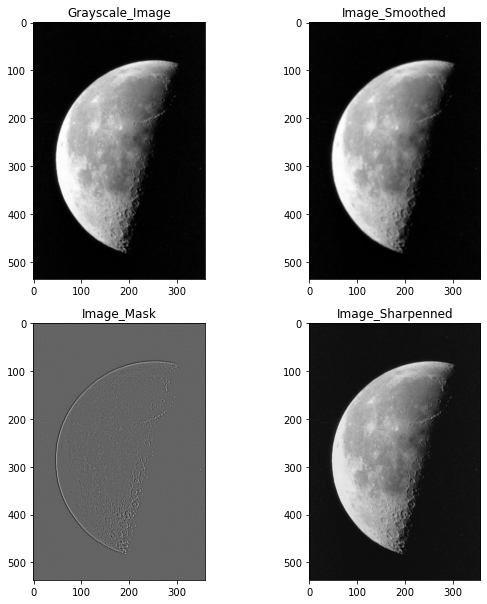

In [57]:
figure4=plt.figure(4, figsize=(8.5, 8.5))

subplot4=figure4.add_subplot(2,2,1)
plt.imshow(Grayscale_Image,cmap="gray")
subplot4.set_title('Grayscale_Image')

subplot4=figure4.add_subplot(2,2,2)
plt.imshow(Image_Smoothed,cmap="gray")
subplot4.set_title('Image_Smoothed')

subplot4=figure4.add_subplot(2,2,3)
plt.imshow(Image_Mask,cmap="gray")
subplot4.set_title('Image_Mask')

subplot4=figure4.add_subplot(2,2,4)
plt.imshow(Image_Sharpenned,cmap="gray")
subplot4.set_title('Image_Sharpenned')

figure4.tight_layout()

## Η πρώτη παράγωγος για μη γραμμική όξυνση εικόνας (Gradient-κλίση εικόνας)

Οι πρώτοι παράγωγοι στην επεξεργασία εικόνας μπορούν να υλοποιηθούν με χρήση του
πλάτους του διανύσματος της κλίσης

**Εδώ** θα χρησιμοποιήσουμε το φίλτρο Sobel 



***extra Info***
The Sobel–Feldman operator is based on convolving the image with a small, separable, and integer-valued filter in the horizontal and vertical directions. The operator uses two 3×3 kernels which are convolved with the original image to calculate approximations of the derivatives – one for horizontal changes, and one for vertical.

***extra study***
https://medium.com/datadriveninvestor/understanding-edge-detection-sobel-operator-2aada303b900

https://www.youtube.com/watch?v=uihBwtPIBxM&ab_channel=Computerphile

In [16]:
Grayscale_Image_2 = mpimg.imread('coins.png')

Grayscale_Image_2= np.asarray(Grayscale_Image_2, dtype = np.float64 )

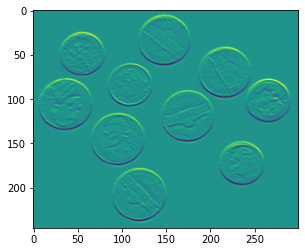

In [23]:
# Compute the Sobel filter for two values of directions

Image_Gradient_x = scipy.ndimage.sobel(Grayscale_Image_2, 0)  # horizontal derivative
plt.imshow(Image_Gradient_x)

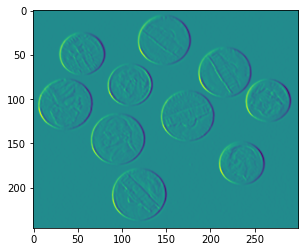

In [25]:
Image_Gradient_y = scipy.ndimage.sobel(Grayscale_Image_2, 1)  # vertical derivative
plt.imshow(Image_Gradient_y)

In [30]:
Image_Magnitude = np.hypot(Image_Gradient_x, Image_Gradient_y)  #Given the "legs" of a right triangle, return its hypotenuse
Image_Magnitude *= 255.0 / np.max(Image_Magnitude)  # normalize (Q&D)

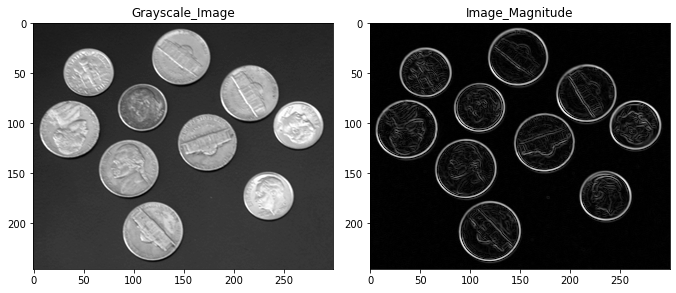

In [18]:
figure5=plt.figure(5, figsize=(9.5, 9.5))

subplot5=figure5.add_subplot(1,2,1)
plt.imshow(Grayscale_Image_2,cmap="gray")
subplot5.set_title('Grayscale_Image')

subplot5=figure5.add_subplot(1,2,2)
plt.imshow(Image_Magnitude,cmap="gray")
subplot5.set_title('Image_Magnitude')

figure5.tight_layout()

## Άσκηση
1. Κατεβάστε από το eclass την εικόνα moon.png
2. Εφαρμόστε το φίλτρο Sobel στην εικόνα
3. Εμφανίστε σε ένα figure με ένα 1x2 subplot την αρχική εικόνα και την οξυμένη εικόνα
4. Αποθηκέυστε το figure
5. Ανεβάστε στο eclass έναν συμπιεσμένο φάκελο με όνομα dip_lab9_AM.zip (όπους ΑΜ ο αριθμός μητρώου σας), ο οποίος θα περιέχει   τον κώδικά σας και το figure που αποθηκεύσατε

